<img src="header_escom26.jpg" alt="header" style="height:200px;">

# Práctica 7:  Greedy - Problema de la mochila fraccionada</br>
# Ibarra Soto Alejandro
# 2015080672

**Análisis de Algoritmos** </br>
**Profesor: Dr. Flavio Arturo Sánchez Garfias** </br>
**3CM2**

<h1>Mochila fraccionada</h1>
Este problema al igual que la mochila entera busca llevar ciertos productos en una mochila, obteniendo la mayor ganancia posible, sin embargo, en esta ocasión los objetos se pueden "partir", es decir, se pueden llevar unicamente un porcentaje del objeto.
<h2>Método de fuerza bruta</h2>
El método de fuerza bruta consiste en realizar todas las posibles ganancias, que al ser mochila fraccionada los valores son continuos, es por ello que primero se calculan todas las posibles combinanciones binarias.
<center><img src="i2.png"></center></br>
Una vez que se tienen, por cada una de esta combinaciones nos indican que objetos se van a llevar, nos falta determinar que parte de cada uno se llevará. para ello se obtiene todas las permutaciones del orden en que se pueden ir metiendo los unicos objetos que se llevarán, tratando de meter todo del primer objeto que se ingrese, luego del segundo y así hasta llenar la mochila.
<center><img src="i3.png"></center></br>
Tras realizar todas las posibles combinaciones se elige aquella que de una mayor ganancia.
<h2>Método Greedy</h2>
Este resulta ser bastante fácil pues teniendo el arreglo de peso (w) y el de valor (v) se divide el valor entre el peso (v/w) para obtener el arreglo que no de el valor por unidad de peso, al tener esto, se sabe cual es el objeto que da mayor ganancia en una unidad de peso comparado con los demás, entonces lo que se tiene que hacer es <b>ordenar este arreglo</b> e ir metiendo todo lo que se pueda empezando por el de mayor valor por unidad de peso.
<center><img src="i1.png"></center></br>

Import packages <a href="https://numpy.org">Numpy</a> and <a href="https://matplotlib.org">Matplotlib</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import itertools
%matplotlib inline

**Definir funciones de ordenamiento**

In [2]:
def mergeSort(arr,ini,fin,pos): #pos 0 es para ordenar el primer elemento, 1 para ordenar el segundo
    if(pos!=0 and pos!=1):
        pos=1
    if ini<fin:
        mitad = int((ini+(fin))/2)
        #Ordenar la primera mitad del arreglo
        mergeSort(arr,ini,mitad,pos)
        #Ordenar la segunda mitad del arreglo
        mergeSort(arr,mitad+1,fin,pos)
        #Ordenar todo el arreglo
        merge(arr,ini,mitad,fin,pos)

def merge(arr,ini,mitad,fin,pos):
    #Obtener el tamaño de los dos subarreglos
    n1 = mitad-ini+1
    n2 = fin-mitad 
    #Crear los dos subarreglos
    #arrInicio = [0] * (n1)
    #arrFin = [0] * (n2) 
    arrInicio = np.zeros((n1,2))
    arrFin = np.zeros((n2,2))
    #Copiar los datos a los subarreglos
    for i in range(n1): 
        arrInicio[i,0]=arr[ini+i,0]
        arrInicio[i,1]=arr[ini+i,1]
    for j in range(n2): 
        arrFin[j,0]=arr[mitad+j+1,0]
        arrFin[j,1]=arr[mitad+j+1,1]
    i = 0 
    j = 0 
    k = ini
    #Ordenar los dos subarreglos en el arreglo inicial
    while i < n1 and j < n2 : 
        if arrInicio[i,pos]<=arrFin[j,pos]: 
            arr[k,0] = arrInicio[i,0]
            arr[k,1] = arrInicio[i,1] 
            i=i+1
        else: 
            arr[k,0]=arrFin[j,0] 
            arr[k,1]=arrFin[j,1] 
            j=j+1
        k=k+1
    #Copiar los elementos que sobraron en los dos subarreglos
    while i<n1: 
        arr[k,0]=arrInicio[i,0]
        arr[k,1]=arrInicio[i,1]
        i=i+1
        k=k+1
    while j<n2: 
        arr[k,0] = arrFin[j,0]
        arr[k,1] = arrFin[j,1] 
        j=j+1
        k=k+1
        
def mergeSortArr(arr,ini,fin):
    if ini<fin:
        mitad = int((ini+(fin))/2)
        #Ordenar la primera mitad del arreglo
        mergeSortArr(arr,ini,mitad)
        #Ordenar la segunda mitad del arreglo
        mergeSortArr(arr,mitad+1,fin)
        #Ordenar todo el arreglo
        mergeArr(arr,ini,mitad,fin)

def mergeArr(arr,ini,mitad,fin):
    #Obtener el tamaño de los dos subarreglos
    n1 = mitad-ini+1
    n2 = fin-mitad 
    #Crear los dos subarreglos
    arrInicio = [0] * (n1)
    arrFin = [0] * (n2) 
    #Copiar los datos a los subarreglos
    for i in range(n1): 
        arrInicio[i]=arr[ini+i]
    for j in range(n2): 
        arrFin[j]=arr[mitad+j+1]
    i = 0 
    j = 0 
    k = ini
    #Ordenar los dos subarreglos en el arreglo inicial
    while i < n1 and j < n2 : 
        if arrInicio[i]<=arrFin[j]: 
            arr[k] = arrInicio[i] 
            i=i+1
        else: 
            arr[k]=arrFin[j] 
            j=j+1
        k=k+1
    #Copiar los elementos que sobraron en los dos subarreglos
    while i<n1: 
        arr[k]=arrInicio[i] 
        i=i+1
        k=k+1
    while j<n2: 
        arr[k] = arrFin[j] 
        j=j+1
        k=k+1

**Definir la función de fuerza bruta**

In [3]:
def fractionedKapsack_FB(v,w,wM):
    v_w = np.zeros((len(v)))
    for i in range (len(v)):
        v_w[i]=float(v[i]/w[i])
    lista = list(product([0,1], repeat=len(w)))
    tamOpcion = len(lista[0])
    tamLista = len(lista)
    mejorGanancia=0
    mejorOpcion = [0]*(tamOpcion)
    for i in range (tamLista):
        permutaciones = list(np.arange(0,tamOpcion))
        permutaciones=list(itertools.permutations(permutaciones))
        tamPermutaciones = len(permutaciones)
        for j in range (tamPermutaciones):
            pesoAuxiliar=wM
            gananciaAuxiliar=0
            aux=[0]*(tamOpcion)
            for k in range (tamOpcion):
                if (pesoAuxiliar>0):
                    fraccion = pesoAuxiliar / w[permutaciones[j][k]]
                    if(fraccion>1):
                        fraccion=1
                    aux[permutaciones[j][k]]= fraccion * lista[i][permutaciones[j][k]]
                    pesoAuxiliar=pesoAuxiliar-fraccion*w[permutaciones[j][k]]*lista[i][permutaciones[j][k]]
                    gananciaAuxiliar=gananciaAuxiliar+fraccion*v[permutaciones[j][k]]*lista[i][permutaciones[j][k]]
            if(gananciaAuxiliar>mejorGanancia):
                mejorOpcion=aux
                mejorGanancia=gananciaAuxiliar
    return mejorOpcion

**Definir la función Greedy**

In [4]:
def fractionedKapsack(v,w,wM):
    n = len(v)
    v_w = np.zeros((n,2))
    #print(v_w)
    for i in range (n):
        v_w[i,0]=float(v[i]/w[i])
        v_w[i,1]=i
    mergeSort(v_w,0,len(v_w)-1,0)
    i=len(w)-1
    lista = [0]*(len(w))
    while(wM>0):
        indice = int(v_w[i,1])
        aux=float(wM/w[indice])
        if(aux>1):
            aux=1
            lista[indice]=1
        else:
            lista[indice]=aux
        wM=wM-aux*w[indice]
        i=i-1
    return lista

In [5]:
peso=[3,5,2]
precio=[5,10,6]
fractionedKapsack_FB(precio,peso,6)

[0, 0.8, 1]

In [6]:
fractionedKapsack(precio,peso,6)

[0, 0.8, 1]

# Pruebas 

A continuación, se crearán arreglos de 10, 100, 1000, 10000, 100000, 1000000 digitos

In [7]:
from time import time
timeDV = [0] * (6) #tiempoFuerzaBruta
timePD = [0] * (6) #tiempoGreedy

# Datos de tamaño 10

In [8]:
np.random.seed(101) #THE SEED
tam=10
peso1 = np.random.randint(1,100,tam)
precio1 = np.random.randint(1,100,tam)
print(peso1)
print(precio1)

[96 12 82 71 64 88 76 10 78 41]
[ 5 64 41 61 93 65  6 13 94 41]


**A continuación, ingresa el peso de la mochila**

In [9]:
w1 = 75

**Fuerza bruta**

In [ ]:
start_time = time()
print(fractionedKapsack_FB(precio1,peso1,w1))
elapsed_time = time() - start_time
timeDV[0]=elapsed_time

**Greedy**

In [11]:
start_time = time()
print(fractionedKapsack(precio1,peso1,w1))
elapsed_time = time() - start_time
timePD[0]=elapsed_time

[0, 1, 0, 0, 0.984375, 0, 0, 0, 0, 0]


# Datos de tamaño 100

In [12]:
np.random.seed(101) #THE SEED
tam=100
peso2 = np.random.randint(1,100,tam)
precio2 = np.random.randint(1,100,tam)
print(peso2)
print(precio2)

[96 12 82 71 64 88 76 10 78 41  5 64 41 61 93 65  6 13 94 41 50 84  9 30
 60 35 45 73 20 11 77 96 88  1 74  9 63 37 84 29 64  8 11 53 57 39 74 53
 19 72 16 45  1 13 18 76 80 98 94 25 37 64 20 36 31 11 61 21 28  9 87 27
 88 47 48 55 87 10 46  3 19 59 93 12 11 95 36 29  4 84 85 48 15 70 61 70
 52  7 89 72]
[69 24 36 80 99 68 83 58 78 47  4 47 30 87 22 22 82 24 95 72 21 28 76  6
 50 87 90 64 83 78  4 57 15 50 88 53 14 48 50 25 21 65 53 61 48 30 61 54
 12 41 92 46 98 25 37 39 10 53 68 44  2 80 69 69 62 19 52 15 29 18 88 47
 53 17 71 72 85 11 63 97 58 24 87 86 27 77 67 55 18 66 58 90  3 81 51 67
 89 80 94  7]


**A continuación, ingresa el peso de la mochila**

In [13]:
w2 = 750

**Fuerza bruta**

In [ ]:
start_time = time()
print(fractionedKapsack_FB(precio2,peso2,w2))
elapsed_time = time() - start_time
timeDV[1]=elapsed_time

**Greedy**

In [14]:
start_time = time()
print(fractionedKapsack(precio2,peso2,w2))
elapsed_time = time() - start_time
timePD[1]=elapsed_time

[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0.5625, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]


# Datos de tamaño 1000

In [15]:
np.random.seed(101) #THE SEED
tam=1000
peso3 = np.random.randint(1,100,tam)
precio3 = np.random.randint(1,100,tam)
print(peso3)
print(precio3)

[96 12 82 71 64 88 76 10 78 41  5 64 41 61 93 65  6 13 94 41 50 84  9 30
 60 35 45 73 20 11 77 96 88  1 74  9 63 37 84 29 64  8 11 53 57 39 74 53
 19 72 16 45  1 13 18 76 80 98 94 25 37 64 20 36 31 11 61 21 28  9 87 27
 88 47 48 55 87 10 46  3 19 59 93 12 11 95 36 29  4 84 85 48 15 70 61 70
 52  7 89 72 69 24 36 80 99 68 83 58 78 47  4 47 30 87 22 22 82 24 95 72
 21 28 76  6 50 87 90 64 83 78  4 57 15 50 88 53 14 48 50 25 21 65 53 61
 48 30 61 54 12 41 92 46 98 25 37 39 10 53 68 44  2 80 69 69 62 19 52 15
 29 18 88 47 53 17 71 72 85 11 63 97 58 24 87 86 27 77 67 55 18 66 58 90
  3 81 51 67 89 80 94  7 93 43 23 21 26 98 55 72 73 81 94 65 64 81 39 46
 36 26 96 76 73 12 77 80 51 23 60 67  2 35 38 58 36 43 45 50 32 80 86  4
 56 74 94 95 41 55 89 95 87 18 69 18 19 61 84 83  8 68 35 77 95 21 70 74
 60 35 70 26 79 93 75 76 34 10 44 21 83 31  4 47 30 48 28 82 72 26 95 58
 22 30  7 55 48 48 61  7 76 98 54 45 99 40 33 88 79 22 91 15 21  2 71 26
 46 97 33 32 42 80 88 23 95 47 72 25 42 37 32 17 88

**A continuación, ingresa el peso de la mochila**

In [16]:
w3 = 750

**Fuerza bruta**

In [ ]:
start_time = time()
print(fractionedKapsack_FB(precio3,peso3,w3))
elapsed_time = time() - start_time
timeDV[2]=elapsed_time

**Greedy**

In [17]:
start_time = time()
print(fractionedKapsack(precio3,peso3,w3))
elapsed_time = time() - start_time
timePD[2]=elapsed_time

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0.42105263157894735, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Datos de tamaño 10000

In [18]:
np.random.seed(101) #THE SEED
tam=10000
peso4 = np.random.randint(1,100,tam)
precio4 = np.random.randint(1,100,tam)
print(peso4)
print(precio4)

[96 12 82 ... 79 22 46]
[84 39 49 ... 96 54 79]


**A continuación, ingresa el peso de la mochila**

In [19]:
w4 = 750

**Fuerza bruta**

In [ ]:
start_time = time()
print(fractionedKapsack_FB(precio4,peso4,w4))
elapsed_time = time() - start_time
timeDV[3]=elapsed_time

**Greedy**

In [20]:
start_time = time()
print(np.array(fractionedKapsack(precio4,peso4,w4)))
elapsed_time = time() - start_time
timePD[3]=elapsed_time

[0. 0. 0. ... 0. 0. 0.]


# Datos de tamaño 100000

In [21]:
np.random.seed(101) #THE SEED
tam=100000
peso5 = np.random.randint(1,100,tam)
precio5 = np.random.randint(1,100,tam)
print(peso5)
print(precio5)

[96 12 82 ... 50 28  7]
[69 89 61 ... 64 50  2]


**A continuación, ingresa el peso de la mochila**

In [22]:
w5 = 750

**Fuerza bruta**

In [ ]:
start_time = time()
print(fractionedKapsack_FB(precio5,peso5,w5))
elapsed_time = time() - start_time
timeDV[4]=elapsed_time

**Greedy**

In [23]:
start_time = time()
print(np.array(fractionedKapsack(precio5,peso5,w5)))
elapsed_time = time() - start_time
timePD[4]=elapsed_time

[0. 0. 0. ... 0. 0. 0.]


# Datos de tamaño 1000000

In [24]:
np.random.seed(101) #THE SEED
tam=1000000
peso6 = np.random.randint(1,100,tam)
precio6 = np.random.randint(1,100,tam)
print(peso6)
print(precio6)

[96 12 82 ... 40 51 26]
[87 69 22 ... 74 12 68]


**A continuación, ingresa el peso de la mochila**

In [25]:
w6 = 750

**Fuerza bruta**

In [ ]:
start_time = time()
print(fractionedKapsack_FB(precio6,peso6,w6))
elapsed_time = time() - start_time
timeDV[5]=elapsed_time

**Greedy**

In [26]:
start_time = time()
print(np.array(fractionedKapsack(precio6,peso6,w6)))
elapsed_time = time() - start_time
timePD[5]=elapsed_time

[0. 0. 0. ... 0. 0. 0.]


# Gráficas
**La gráfica con los diferentes tiempos se encuentra a continuación**

**NOTA: La implementación por fuerza bruta para arreglos de tamaño 10 no termino, pues en 2 ocasiones ocasiono el crasheo de la computadora, antes de esto transcurrieron 2 horas, es por ellos que ese tiempo se colocó a continuación para graficar**

In [27]:
timeDV[0]=7200

In [30]:
print("Método:\t\t10 datos\t100 datos\t1000 datos\t10000 datos\t\t100000 datos\t\t1000000 datos\nGreedy\t\t%.10f"%timePD[0],"\t%.10f" %timePD[1], "\t%.10f" %timePD[2], "\t%.10f" %timePD[3], "\t\t%.10f" %timePD[4], "\t\t%.10f" %timePD[5], "\nFB\t\t%.5f"%timeDV[0],"\t%.10f" %timeDV[1], "\t%.10f" %timeDV[2], "\t%.10f" %timeDV[3], "\t\t%.10f" %timeDV[4], "\t\t%.10f" %timeDV[5])

Método:		10 datos	100 datos	1000 datos	10000 datos		100000 datos		1000000 datos
Greedy		0.0009660721 	0.0019636154 	0.0149586201 	0.1944792271 		2.3108930588 		27.4760222435 
FB		7200.00000 	0.0000000000 	0.0000000000 	0.0000000000 		0.0000000000 		0.0000000000


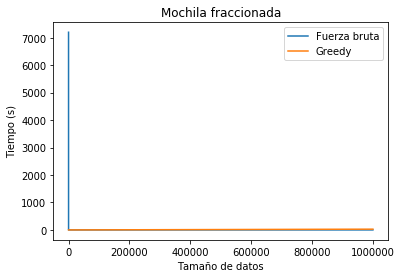

In [31]:
n=[10,100,1000,10000,100000,1000000]
plt.plot(n,timeDV,label="Fuerza bruta")
plt.plot(n,timePD,label="Greedy")

plt.xlabel('Tamaño de datos')
plt.ylabel('Tiempo (s)')

plt.title("Mochila fraccionada")

plt.legend()

plt.show()

# Conclusiones

Gracias al desarrollo de esta práctica se logró asimilar que existen ciertos algoritmos que tienen una manera de resolver los problemas de forma rápida, pues se tiene que el algoritmo de fuerza bruta para este problema requiere de calcular todas las combinaciones que se puedan dar, esto al tener que tomar en cuenta los valores continuos se vuelve demasiado, es por ello, que ni siquiera logró terminar para 10 datos, unicamente con la prueba fue donde logró funcionar, y por el contrario, la implementación de un algortimo Greedy que unicamente consistía en ordenar el arreglo de valor entre peso, esto se logró mediante el método de ordenamiento merge-sort, el cual tiene una complejidad nlog(n), es aquí que se puede ver que los algoritmos Greedy o voraces van formando la solución a un problema a través de elegir la solución óptima de cada punto en el que se encuentre, esperando que al final se logre llevar a cabo la solución óptima, estos algoritmos permiten resolver cierto tipos de problemas como lo es el presente caso, dicha implementación logró finalizar con todos los datos de prueba en tiempo bastante cortos.
Se puede ver que este tipo de algoritmos al ir formando la solución mediante soluciones óptimas parciales, logra obtener la mejor alternativa de solución, al hacerlo de esta forma no se vuelve tan complicado el algoritmo y se logra generar la solución en un tiempo corto, y quedo demostrado al poder elegir que productos y en que cantidad se iban a llevar, obteniendo la mayor ganancia posible.